In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'...\Times articles data\lda_data\comment_analysis_new.csv',
                index_col='index')

### A note on LDA models

The risk of using LDA models is that some LDA generated topics can describe patterns that aren't easily interpretable by humans. <br> This happens due to the fact that LDA model simply looks at similarities in words/phrases used in documents. Hence an LDA topic can represent a semantic topic characterised by particular phrases as well as distinct type of writing, specific to a genre of the article (e.g. tabloid news, although covers a range of semantic topics can be expected to constiute an LDA topic due to the distict language used across tabloid news stories).

### What are people talking about? What is trending?

In [3]:
df_topic_cpd = df.loc[:, ['topic1', 'topic1_words', 'comments_per_day']].groupby(['topic1', 'topic1_words']).mean().sort_values('comments_per_day', ascending=False)

In [4]:
df_topic_cpd.head(5)

,,comments_per_day
topic1,topic1_words,
3,"['black', 'white', 'american', 'america', 'african_american', 'racial', 'race', 'asian', 'racism', 'community']",30.484792
61,"['girl', 'boy', 'gender', 'iraqi', 'qatar', 'planned_parenthood', 'falcon', 'tally', 'thrill', 'juror']",29.349829
77,"['mr', 'investigation', 'official', 'campaign', 'news', 'former', 'information', 'report', 'public', 'time']",16.568315
53,"['north_korea', 'nuclear', 'north_korean', 'north', 'south_korea', 'test', 'korean', 'korea', 'program', 'nuclear_weapon']",14.831900
30,"['car', 'driver', 'uber', 'mar', 'admission', 'incoming', 'crash', 'harris', 'rodriguez', 'service']",14.184409


1. Racism (topic 3)
2. Societal issues, children, wealth etc. (topic 61)
3. Official news reports and press releases (topic 77)
4. North Korea (topic 53)

Interestingly, topic 47, ranking 6 is a New York Times "What's Going On in This Picture?" series, where supposedly people post their bets in the comments section (what would explain a high number of comments per day). This is a great example of the power of LDA modelling. Where seemingly there is no semantic "common denominator" the model has defined a topic.

### What content resonates with the audience?

Lets filter for the most active articles to learn more about the readers' sentiment.

In [5]:
df_most_active = df[df.comments_per_day >= 1]

In [6]:
df_emotional = df_most_active.loc[:, ['topic1', 'topic1_words', 'article_sentiment']].groupby(['topic1', 'topic1_words']).mean()

In [7]:
df_emotional.sort_values('article_sentiment', ascending=False).head()

,,article_sentiment
topic1,topic1_words,
10,"['cat', 'super_bowl', 'eagle', 'patriot', 'berry', 'theatrical', 'dixon', 'trophy', 'crab', 'nursing_home']",0.232393
75,"['ms', 'art', 'show', 'movie', 'mr', 'film', 'theater', 'good', 'music', 'song']",0.140779
31,"['food', 'restaurant', 'wine', 'good', 'chef', 'chicken', 'meat', 'bar', 'meal', 'dish']",0.130025
8,"['photo', 'image', 'editor', 'photographer', 'time', 'mr', 'photograph', 'year', 'photography', 'picture']",0.124593
37,"['sleep', 'light', 'pan', 'sun', 'night', 'japanese', 'salad', 'sound', 'dinner', 'minute']",0.119943


The topics associated with most positive sentiment are:
1. Tabloid journalism topics (lifestyle, gossip etc.) (topic 67)
2. Film & theater (topic 21)
3. Food lifestyle (topic 31)
4. Pictures, photos (topic 8)
5. Home, wellness, lifestyle (good sleep, kitchen, dining etc.) (topic 37)

In [8]:
df_emotional.sort_values('article_sentiment').head()

,,article_sentiment
topic1,topic1_words,
38,"['baseball', 'game', 'ball', 'soccer', 'rule', 'base', 'pitcher', 'change', 'theme_entrie', 'transgender']",0.035259
48,"['case', 'law', 'court', 'crime', 'judge', 'lawyer', 'prison', 'federal', 'state', 'legal']",0.035617
55,"['amazon', 'garcia', 'venezuela', 'graham', 'reduce', 'hawaii', 'indigenous', 'elevator', 'timothy', 'false']",0.042208
77,"['mr', 'investigation', 'official', 'campaign', 'news', 'former', 'information', 'report', 'public', 'time']",0.042465
11,"['immigration', 'immigrant', 'mexico', 'border', 'refugee', 'country', 'muslim', 'israel', 'wall', 'united_state']",0.043262


The topics associated with the most negative sentiment are:
1. Not obvious, sport related (topic 38)
2. Criminal press releases and reports (topic 48)
3. Autocracy related (features articles on Venezuela, White Power and Erdogan) (topic 55)
4. Trump campaign investigation (topic 77)
5. Immigration (topic 11)

In [9]:
df.article_sentiment.describe()

count    9329.000000
mean        0.086951
std         0.073897
min        -0.749251
25%         0.047032
50%         0.071315
75%         0.112264
max         0.924538
Name: article_sentiment, dtype: float64

In [10]:
df.topic1_sentiment.describe()

count    9329.000000
mean        0.093000
std         0.103488
min        -0.999001
25%         0.035655
50%         0.082679
75%         0.133200
max         0.999001
Name: topic1_sentiment, dtype: float64

In [11]:
df.topic2_sentiment.describe()

count    9280.000000
mean        0.090471
std         0.108833
min        -0.999001
25%         0.027298
50%         0.076080
75%         0.131648
max         0.999001
Name: topic2_sentiment, dtype: float64

It is interesting here to notice that the article sentiment in the comments "averages out", it only reaches from 0.92 to -0.74, whereas both topic1 and topic2 sentiments reach from 0.999 to -0.999.

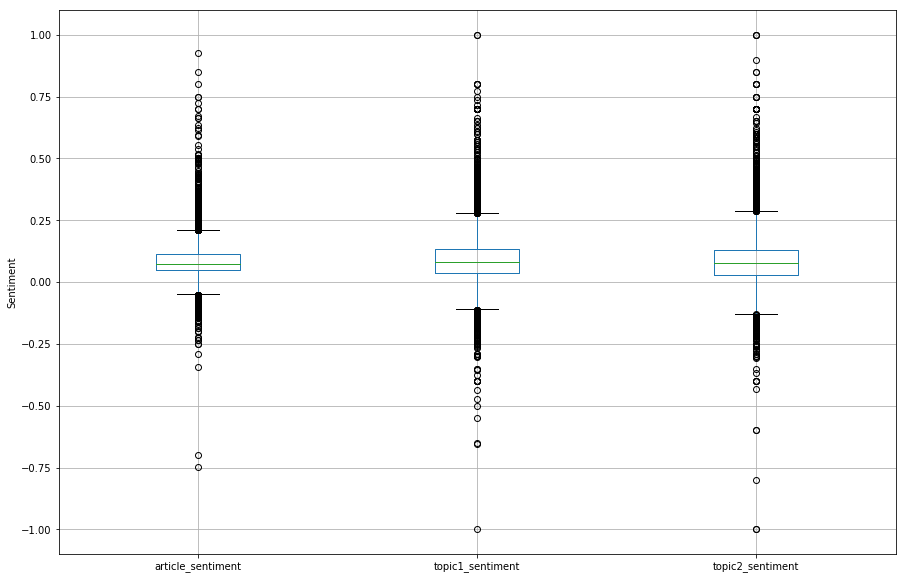

In [12]:
plt.rcParams['figure.figsize'] = (15, 10)
df.loc[:, ['article_sentiment', 'topic1_sentiment', 'topic2_sentiment']].boxplot()
plt.ylabel('Sentiment')
plt.show()

The distributions of sentiment are similar among the topics. To an extent it is to be expected, after all topic1 as well as topic2 sentences are included in article sentiment. Mean and median sentiment of each group is marginally positive, within a distribution clearly shifted towards positive values. <br>
Having said that, the distributions of sentiment of both topic1 and topic2 are significantly more spread out, have higher variance. This is a good sign, it can indicate more variance of opinions as the subset of the text becomes more granular and topic-specific. 

The above plot however gives no insight into the semantic quality of topic assignment. <br>
Plotting a number of sampled topic1 and topic2 sentiments below shows that the sentiments are clearly computed on different information. This would indicate that topic classification is meaningful. Having said that, given few samples this relationship can be facilitated by random noise.

In [13]:
df_subset = df.sample(50)

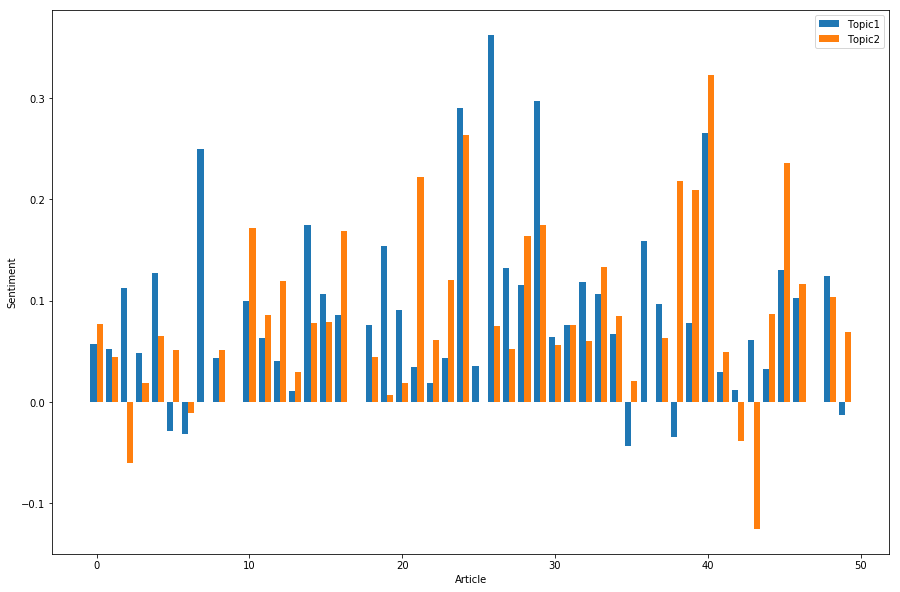

In [14]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.bar(np.asarray(range(0, df_subset.shape[0])) - 0.2, df_subset.topic1_sentiment.values, width=0.4)
plt.bar(np.asarray(range(0, df_subset.shape[0])) + 0.2, df_subset.topic2_sentiment.values, width=0.4)
plt.xlabel('Article')
plt.ylabel('Sentiment')
plt.legend(['Topic1', 'Topic2'])
plt.show()

In [15]:
topic1_snet_by_topic = {}

In [16]:
topic1_sent_by_topic = {topic: df[df.topic1 == topic].topic1_sentiment.values for topic in set(df.topic1)}

In [17]:
topic1_num_samples = {topic: len(topic1_sent_by_topic[topic]) for topic in topic1_sent_by_topic.keys()}

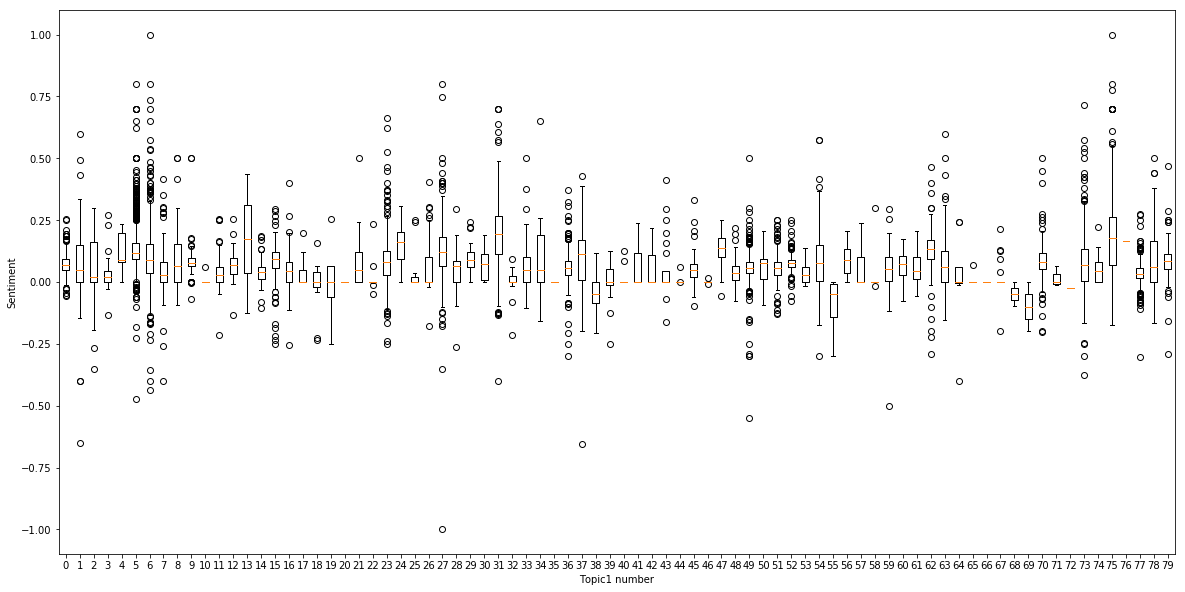

In [18]:
plt.rcParams['figure.figsize'] = (20,10)
plt.boxplot(topic1_sent_by_topic.values())
plt.xticks(range(1, len(topic1_sent_by_topic.keys())+1), list(topic1_sent_by_topic.keys()))
plt.xlabel('Topic1 number')
plt.ylabel('Sentiment')
plt.show()

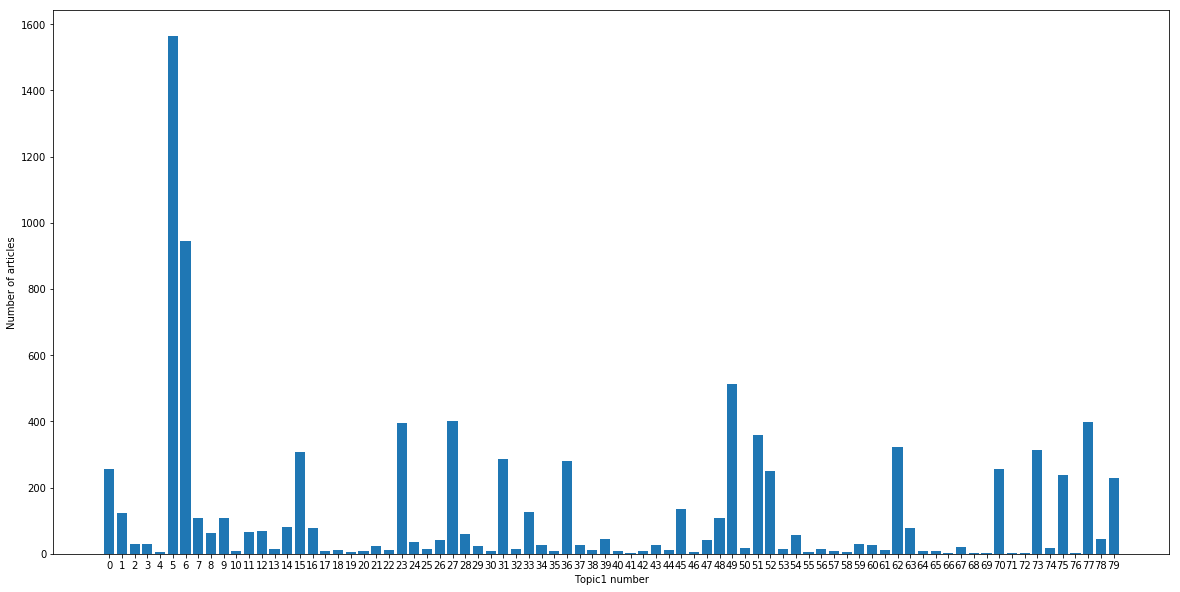

In [19]:
plt.rcParams['figure.figsize'] = (20,10)
plt.bar(topic1_num_samples.keys(), topic1_num_samples.values())
plt.xticks(list(topic1_num_samples.keys()))
plt.xlabel('Topic1 number')
plt.ylabel('Number of articles')
plt.show()

The data is unbalanced with a couple of topics accounting for a large proportion of articles. <br>
Having said that there is still a large number of topics represented with a significant number of samples. Looking at the box plots it is clear that there exists a meaningful variation in the sentiment as topics change.

##### Is there a relationship between article engagement and sentiment?

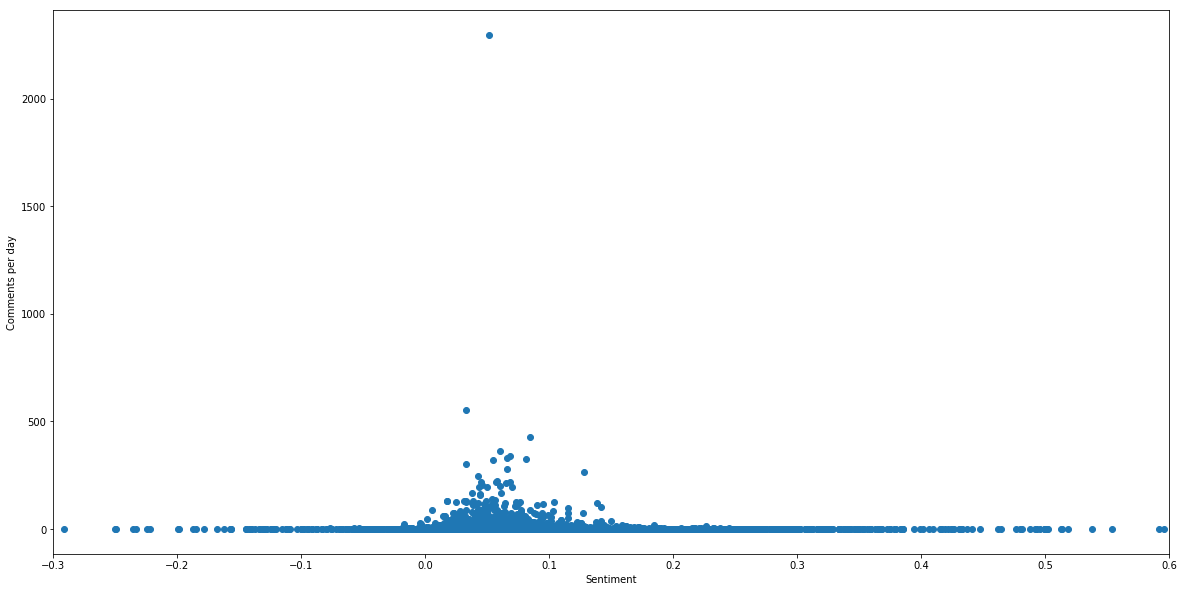

In [20]:
plt.scatter(df.article_sentiment.values, df.comments_per_day.values)
plt.xlim(xmin=-0.3, xmax=0.6)
plt.xlabel('Sentiment')
plt.ylabel('Comments per day')
plt.show()

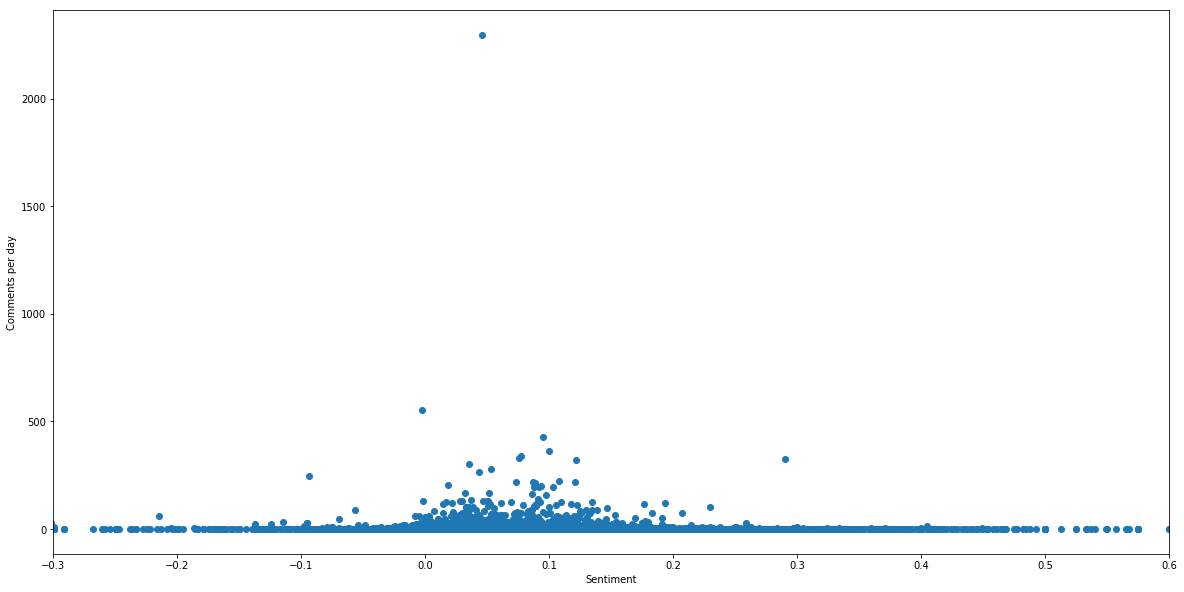

In [21]:
plt.scatter(df.topic1_sentiment.values, df.comments_per_day.values)
plt.xlim(xmin=-0.3, xmax=0.6)
plt.xlabel('Sentiment')
plt.ylabel('Comments per day')
plt.show()

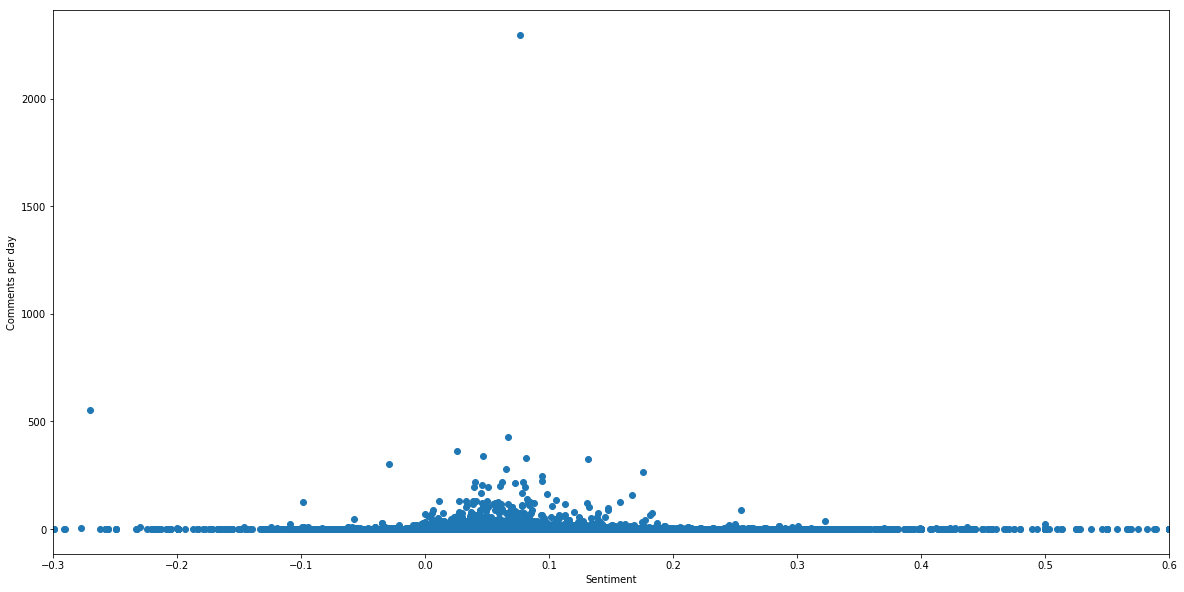

In [22]:
plt.scatter(df.topic2_sentiment.values, df.comments_per_day.values)
plt.xlim(xmin=-0.3, xmax=0.6)
plt.xlabel('Sentiment')
plt.ylabel('Comments per day')
plt.show()

There doesn't seem to be any relationship between the number of comments per day and sentiment. The data however is very noisy, with a high number of samples characterised by a low number of comments per day.

To dive in deeper it might be useful to get rid of the less engaging articles. Lets look at the distribution of comments per day.

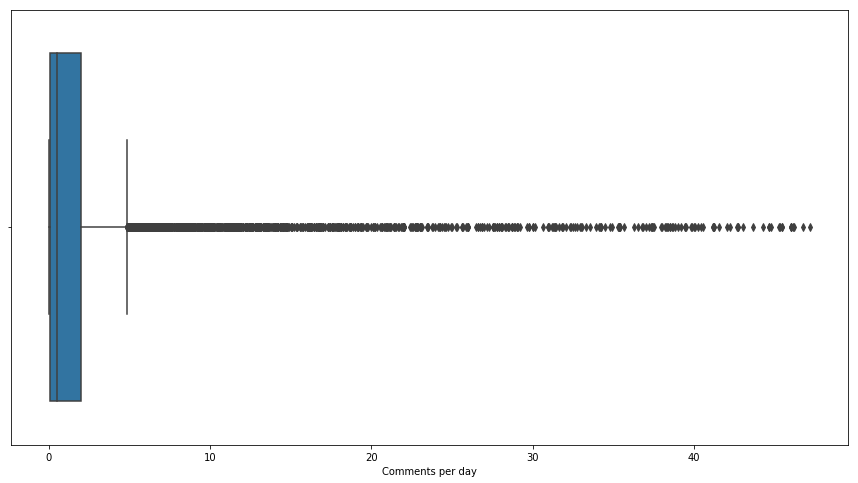

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.boxplot(df.comments_per_day[df.comments_per_day < 50].values)
plt.xlabel('Comments per day')
plt.show()

Lets filter out the articles with less than 1 comment per day.

In [24]:
df_active = df[df.comments_per_day >= 1]

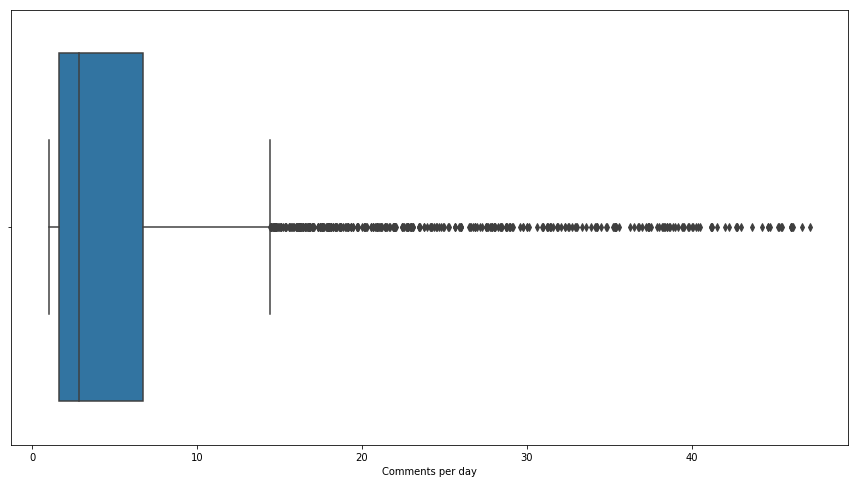

In [25]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.boxplot(df_active.comments_per_day[df_active.comments_per_day < 50].values)
plt.xlabel('Comments per day')
plt.show()

In [26]:
df_subset = df_active.sample(50, random_state=1)

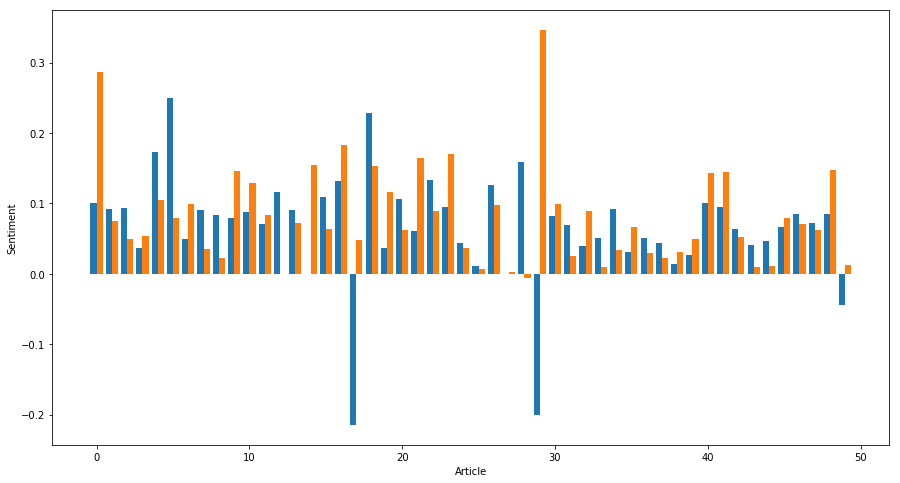

In [27]:
plt.bar(np.asarray(range(0, df_subset.shape[0])) - 0.2, df_subset.topic1_sentiment.values, width=0.4)
plt.bar(np.asarray(range(0, df_subset.shape[0])) + 0.2, df_subset.topic2_sentiment.values, width=0.4)
plt.ylabel('Sentiment')
plt.xlabel('Article')
plt.show()

As expected, among engaging articles (where more data is availabe) topic sentiments are more similar, due to less noise (more samples). Nevertheless there still are significant differences between the topic sentiments. <br>
From now on only the active articles (those with at least 1 comment per day) will be investigated in the analysis.

#### Are topics connected to sentiment?

In [28]:
sent_by_topic1 = df_active.loc[:, ['topic1', 'article_sentiment', 'topic1_sentiment', 
                                   'topic2_sentiment']].groupby('topic1').mean()

In [29]:
sent_by_topic2 = df_active.loc[:, ['topic2', 'article_sentiment', 'topic1_sentiment', 
                                   'topic2_sentiment']].groupby('topic2').mean()

##### Relationship between overall article sentiment and the article's main topic

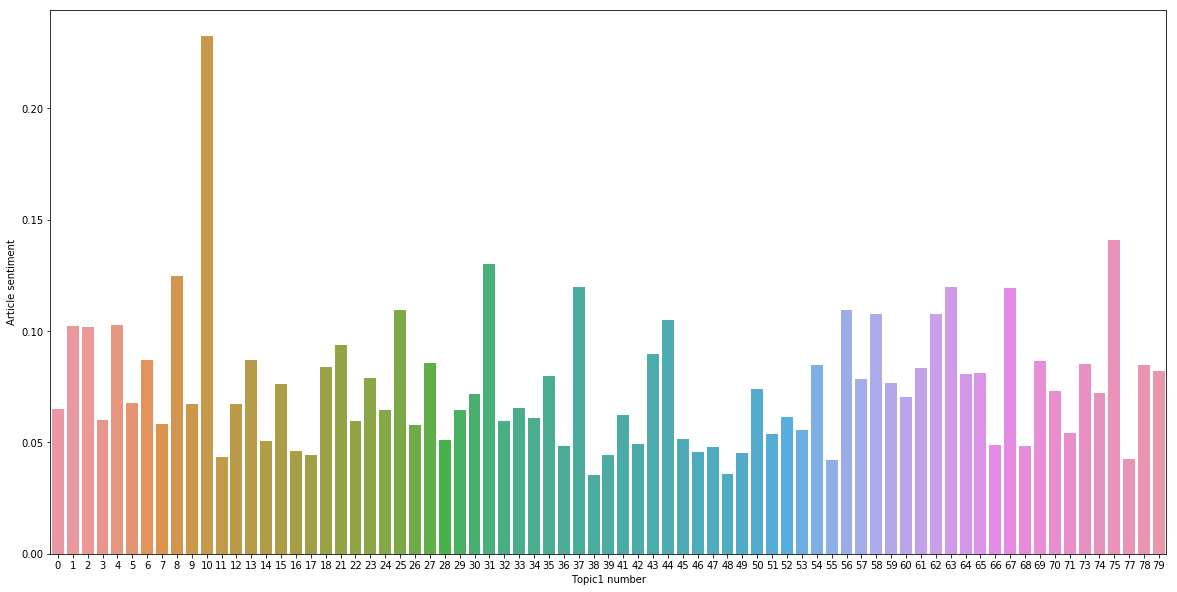

In [30]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(sent_by_topic1.index, sent_by_topic1.article_sentiment.values)
plt.xlabel('Topic1 number')
plt.ylabel('Article sentiment')
plt.show()

It seems that there might be a meaningful difference between article topics and their sentiment.

##### Relationship between topic1 and its sentiment

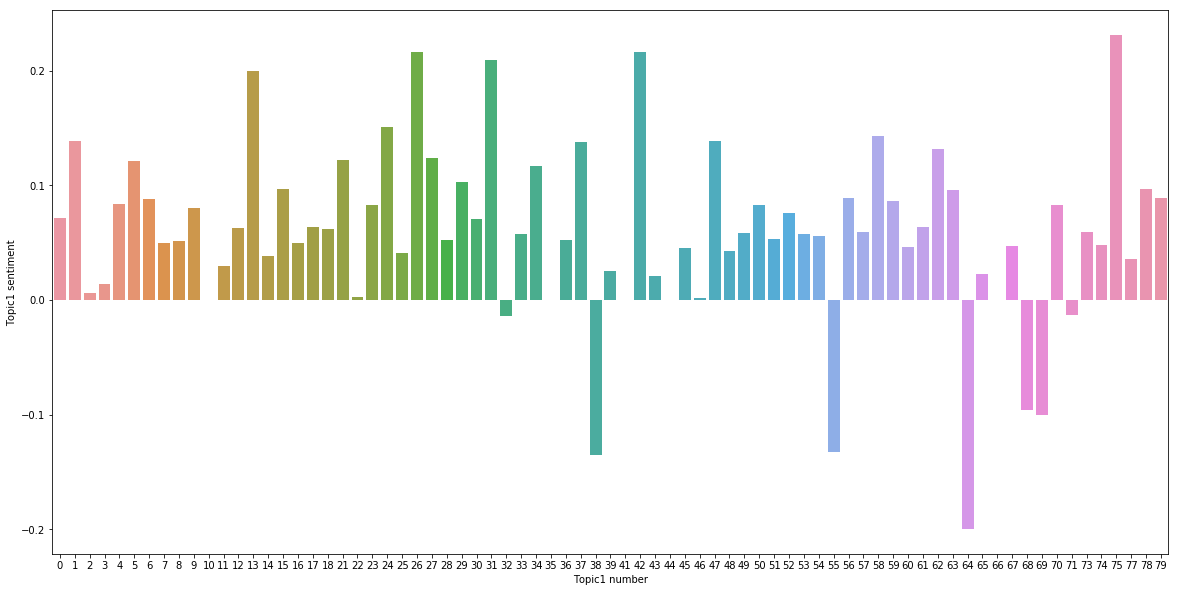

In [31]:
plt.rcParams['figure.figsize'] = (20,10)
sns.barplot(sent_by_topic1.index, sent_by_topic1.topic1_sentiment.values)
plt.xlabel('Topic1 number')
plt.ylabel('Topic1 sentiment')
plt.show()

##### Relationship between topic2 and its sentiment

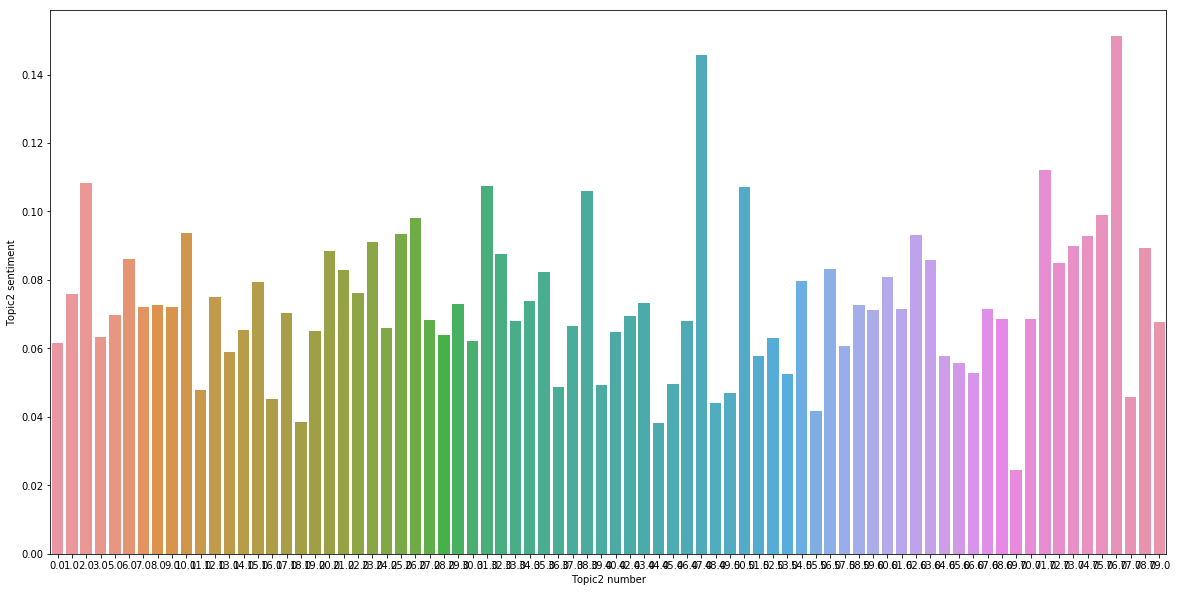

In [32]:
plt.rcParams['figure.figsize'] = (20,10)
sns.barplot(sent_by_topic2.index, sent_by_topic2.article_sentiment.values)
plt.xlabel('Topic2 number')
plt.ylabel('Topic2 sentiment')
plt.show()

It's interesting that the variance among topic2 sentiment is clearly much lower then that of topic1. Generally the insight gained from this sentiment analysis is impressive. <br>
Given high diversity of topics, a small sample size of a number of articles as well as a simple sentiment analyser used, there are many ways in which this analysis could be further improved.

##### Follow up questions

Perhaps the topic / article preference of individuals, when considering the sentiment of the topics, could provide information on an individual's psychological profile? <br>
Going a step further one could imagine that users with similar patters of articles viewed would represent similar sentiment towards the topics, hence perhaps similar political/cultural/esthetic background. <br>
Should this be true observing an individual's reading/viewing behaviour could give interpretable insight into his personality and beliefs. <br>

Could the above topic distribution be generalised to an interpretable high dimensional space (word embedding style)? <br>
This could allow for mapping individuals to "personality" points/vectors in the high dimensional space, which would allow for interpretable and mathematically formal scoring of people's preferences.